In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
import GraphKernel

Creation of example BA graph

In [3]:
g = nx.barabasi_albert_graph(100,1)

Initialization of a GraphKernel instance on the graph

In [4]:
gk = GraphKernel.GraphKernel(g, verbose_level=1)

Initializing GraphKernel... Complete.


We can now evaluate several graph kernels, i.e. similarity matrices between all the nodes of the network.

# Kernel evaluation

In [5]:
hk4 = gk.eval_heat_kernel(4) # Heat Kernel at time instant t=4
rwr06 = gk.eval_rwr_kernel(0.6) # Random Walk with Restart kernel with restart probability alpha=0.6
rw3 = gk.eval_rw_kernel(3) # Simple Random Walk with 3 steps
dsd2 = gk.eval_dsd_kernel(2) # Diffusion State Distance with 2 time steps

Initializing heat kernel (this may take a while)... Complete.
Initializing RWR kernel (this may take a while)... Complete.
Initializing RW kernel (this may take a while)... Complete.
Initializing DSD kernel (this may take a while)... Complete.


These kernels have to be calculated **just once** per network. Notice that kernels are cached and, if we try to recalculate a kernel with the same parameters, the cached version will be returned with considerable time saving.
See Caching section for time tests.

Notice that the returned variable from eval_*  functions is not the kernel matrices itself, but only a string ID used by the GraphKernel object to identify the corresponding cached kernel. Example:

In [6]:
print hk4

hk_4


To retrieve the raw kernel matrix use the [] (getitem) operator, like below:

In [7]:
heat_kernel_matrix = gk[rw3]
heat_kernel_matrix # N by N numpy matrix where the (i,j) element is the raw kernel projection from node j to node i

array([[ 0.        ,  0.10698413,  0.        , ...,  0.        ,
         0.58380952,  0.        ],
       [ 0.06419048,  0.        ,  0.70416667, ...,  0.        ,
         0.        ,  0.03333333],
       [ 0.        ,  0.05868056,  0.        , ...,  0.        ,
         0.00416667,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08333333],
       [ 0.02919048,  0.        ,  0.00416667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00277778,  0.        , ...,  0.08333333,
         0.        ,  0.        ]])

To view the IDs of the kernels that are already evaluated (and thus cached), use the available_kernels() function.

In [8]:
gk.available_kernels()

['hk_4', 'rw_3', 'dsd_2', 'rwr_0.6']

The IDs are composed by an acronym of the kernel name (e.g. hk = heat kernel, rw = random walk, etc.) followed by the value of the parameter(s) associated to that kernel.

# Kernel Projection

We define 4 randomly chosen node IDs as source nodes

In [9]:
source_nodes = [23, 45, 11, 98] # node ids chosen at random

We proceed to calculating the kernel projection from the source nodes to the whole network. The projection is returned as a dictionary {node_id : projection_value} if the return_dict parameter is set to True. Otherwise a (N,)-length numpy vector is returned, where the node IDs are ordered as the optional nodelist parameter set in the GraphKernel constructor (default = graph.nodes())

In [10]:
proj = gk.get_projection(source_nodes, rwr06)
proj

{0: 0.68593046226514476,
 1: 0.28626723473661464,
 2: 0.0095422411578871512,
 3: 0.010660603479111073,
 4: 0.013718609245302894,
 5: 0.015732350051952861,
 6: 0.014949210959031898,
 7: 0.013718609245302896,
 8: 0.01035876834337013,
 9: 0.015356652140264434,
 10: 0.0012585880041562291,
 11: 0.66708544483185095,
 12: 0.002166552312903173,
 13: 0.015040177785586837,
 14: 0.00096205828052794268,
 15: 0.014911531788372713,
 16: 0.00097663492114200196,
 17: 0.00085943873060496207,
 18: 0.0029823063576745433,
 19: 0.014911531788372715,
 20: 0.00093006508222841764,
 21: 0.00091561672692057859,
 22: 0.00094944387229256469,
 23: 0.61371860924530286,
 24: 0.010372001258572993,
 25: 0.00096456201060088451,
 26: 0.014954578564615595,
 27: 0.00010249440972991556,
 28: 9.4944387229256463e-05,
 29: 0.00085284827832888632,
 30: 0.010372001258572992,
 31: 0.00085284827832888643,
 32: 0.00010320042090136566,
 33: 0.0020744002517145981,
 34: 0.00085943873060496186,
 35: 6.2004338815227852e-05,
 36: 0.0016

These values represent the projection from nodes in set source_nodes to the whole network. For the sake of visualization, we can represent the network, with the size of the nodes proportional to their kernel similarity with respect to the source nodes

In [11]:
def draw_network_with_scores(network, scores):
    min_score,max_score = min(scores.values()), max(scores.values())
    labels = {node:str(node) for node in network.nodes()}
    nodesize = [((scores[node]-min_score)/max_score + 0.1) * 1000 for node in network.nodes()]
    nx.draw_spring(network, nodelist=network.nodes(), node_size=nodesize,labels=labels)

/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


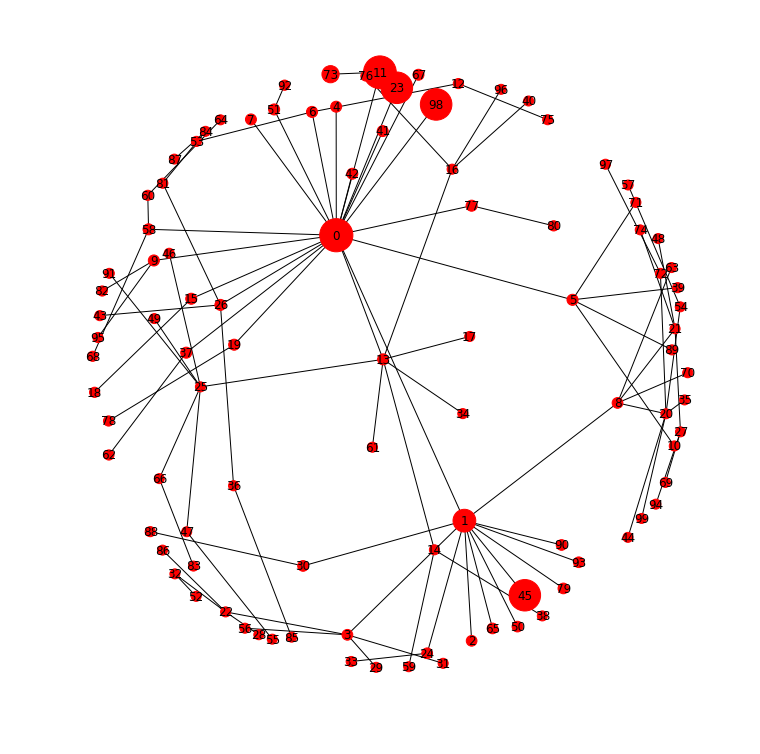

In [12]:
plt.figure(figsize=[10,10])
draw_network_with_scores(g, proj) # Notice that source_nodes are bigger because the RWR kernel favors self-similarity 

If we wish to rank nodes according to their projection magnitude we can use the get_ranking() function, which returns an list of node IDs ordered according to their rank (in increasing order):

In [28]:
ranking = gk.get_ranking(proj) # Notice that get_ranking() 
                     # doesn't need the kernel as argument, 
                     # but only a projection dictionary of vector
ranking[:10] # showing only top10 elements for clarity

[0, 11, 98, 23, 45, 1, 73, 5, 9, 13]

# Statistical significance of ranking

The GraphKernel class offers several ways of calculating the statistical significance of the projection scores.
This allows to control for uninteresting biases, like node degree. For example, by setting correction as 'DEGREE_CENTRALITY', the final node scores are divided by its degree:

In [14]:
proj = gk.get_projection(source_nodes, rwr06, correction=False, norm=False)
proj_degcent = gk.get_projection(source_nodes, rwr06, correction='DEGREE_CENTRALITY', norm=False)

In [15]:
proj_degcent == {node_id : score / nx.degree(g, node_id) for node_id, score in proj.iteritems()}

True

To perform a more sophisticate statistical significance evaluation, we can compare the projection scores to the distribution of projection scores we obtain on a population of random degree-preserved source nodesets.
We first generate 100 random degree-preserved source nodesets with the gen_degree_preserved_sets() function provided in the auxiliary module *deg_preserve_generator.py*

In [16]:
import deg_preserve_generator as gen

In [17]:
random_nodesets = gen.gen_degree_preserved_sets(source_nodes, g, 100) # generates 100 random samples of degree-equivalent source nodesets

In [18]:
random_nodesets[:5] # First 5 samples

[[99, 16, 97, 4],
 [74, 13, 68, 99],
 [41, 12, 62, 88],
 [71, 27, 44, 52],
 [52, 30, 83, 63]]

Notice that the degrees are equivalent (i.e. as similar as possible) to the source nodes:

In [19]:
nx.degree(g, source_nodes)

{11: 2, 23: 1, 45: 1, 98: 1}

In [20]:
nx.degree(g,random_nodesets[1])

{13: 7, 68: 1, 74: 1, 99: 1}

We now calculate the projection scores as the z-score of the raw projection scores against the mean and std.dev. of the projections obtained from the random population:

In [21]:
zscores_proj = gk.get_projection(source_nodes, rwr06, correction='RDM_SEED', rdm_seedsets=random_nodesets, significance_formula='ZSCORE', norm=False)

In [22]:
zscores_proj

{0: 3.8593033325870301,
 1: 0.80842290478142753,
 2: -0.18857377120758534,
 3: -0.43982810150200097,
 4: -0.20052428479215043,
 5: -0.42305422581208862,
 6: -0.26892592646151947,
 7: 3.8593033325870292,
 8: -0.38805846456702231,
 9: -0.11086579081438946,
 10: -0.28610949204305725,
 11: 18.055416165881397,
 12: -0.2360916018358088,
 13: -0.46645086080133202,
 14: -0.34758932576873758,
 15: -0.21241103388303229,
 16: -0.40127640626739391,
 17: -0.25707615619453678,
 18: -0.31550531543312604,
 19: -0.13255910191281359,
 20: -0.55731083908439383,
 21: -0.46703281400209723,
 22: -0.42936863299598871,
 23: 10.035762124614518,
 24: -0.050434521107601188,
 25: -0.50886403771879507,
 26: -0.23161588942550185,
 27: -0.37999365092806708,
 28: -0.25029671758038385,
 29: -0.31737200188421766,
 30: -0.2188923835241347,
 31: -0.2479492440595219,
 32: -0.35909852084114585,
 33: -0.16578759762263476,
 34: -0.27705269085638379,
 35: -0.27966823350030845,
 36: -0.24160975244682287,
 37: -0.13370976301313

From the z-scores we can still obtain the ranking with the get_ranking() function

In [29]:
gk.get_ranking(zscores_proj)

[11,
 23,
 98,
 45,
 0,
 7,
 73,
 1,
 67,
 24,
 58,
 50,
 68,
 42,
 9,
 77,
 95,
 79,
 19,
 37,
 51,
 41,
 93,
 90,
 33,
 85,
 82,
 75,
 2,
 44,
 43,
 4,
 38,
 62,
 80,
 39,
 86,
 63,
 15,
 61,
 30,
 49,
 96,
 40,
 78,
 26,
 55,
 94,
 12,
 65,
 36,
 88,
 31,
 76,
 28,
 48,
 17,
 53,
 81,
 97,
 92,
 6,
 74,
 47,
 34,
 46,
 60,
 59,
 35,
 91,
 56,
 10,
 89,
 64,
 70,
 99,
 52,
 69,
 18,
 29,
 71,
 87,
 84,
 72,
 14,
 57,
 83,
 32,
 54,
 27,
 8,
 16,
 66,
 5,
 22,
 3,
 13,
 21,
 25,
 20]

If we want to consider only a subset of nodes in the ranking we can also provide a candidateset

In [24]:
gk.get_ranking(zscores_proj, candidateset=[56,76,24,34,68])

[24, 68, 76, 34, 56]

# Saving and loading a GraphKernel instance

We can save a GraphKernel instance and all the cached kernels with the save() function:

In [ ]:
gk.save('/path/to/file/some_kernels.h5', description='Kernels for a BA graph of size 1000.')

Notice that if we wish to save only a subset of kernels we can specify a list of Kernel IDs (KIDs) as 

In [ ]:
gk.save('/path/to/file/some_kernels.h5', kidlist=[hk4, rwr06], description='Kernels for a BA graph of size 1000.')

To restore a save set of kernels we can specify the savefile path in the GraphKernel constructor

In [ ]:
saved_gk = GraphKernel.GraphKernel(savefile='/path/to/file/some_kernels.h5')

# Kernel Caching

Kernels that have been previously evaluated by the same GraphKernel instance are cached. So when we try to recalculate a kernel *with the same parameter values* the cached version is returned with considerable time saving (oviously, since the network in this example is very small the time reduction is less evident).
See the example below for a demonstration.

In [26]:
%time rw4 = gk.eval_rw_kernel(4)

 Initializing RW kernel (this may take a while)... Complete.
CPU times: user 861 µs, sys: 772 µs, total: 1.63 ms
Wall time: 755 µs


In [27]:
# Already evaluated in the previous line and thus cached
%time rw4 = gk.eval_rw_kernel(4)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.9 µs
